In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Sample_US_Superstore.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
order_date_df = df.groupby(['Order Date', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
order_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2861 non-null   datetime64[ns]
 1   Category    2861 non-null   object        
 2   Sales       2861 non-null   float64       
 3   Profit      2861 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 89.5+ KB


In [6]:
ship_date_df = df.groupby(['Ship Date', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
ship_date_df

,Ship Date,Category,Sales,Profit
0,2014-01-07,Office Supplies,29.228,10.7910
1,2014-01-08,Office Supplies,307.500,-56.6589
2,2014-01-10,Furniture,2573.820,746.4078
3,2014-01-10,Office Supplies,653.120,279.2902
4,2014-01-10,Technology,1147.940,317.7834
...,...,...,...,...
3086,2018-01-03,Technology,90.930,2.7279
3087,2018-01-04,Office Supplies,329.374,153.0802
3088,2018-01-04,Technology,14.850,4.0095
3089,2018-01-05,Furniture,101.120,37.4144


In [7]:
def date_to_numeric(dates):
    # Calculate the number of days from the minimum date
    return (dates - dates.min()).dt.days

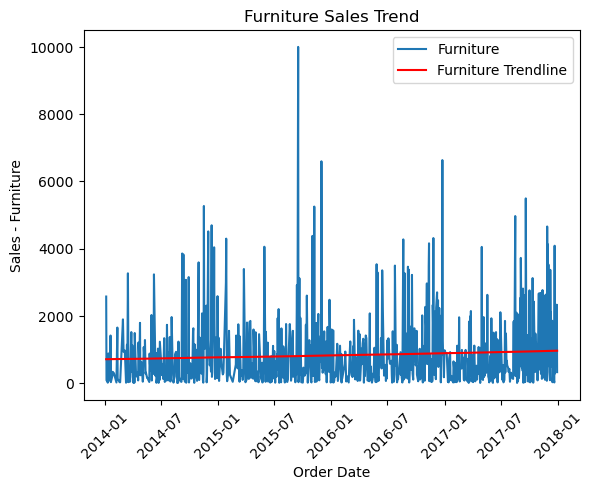

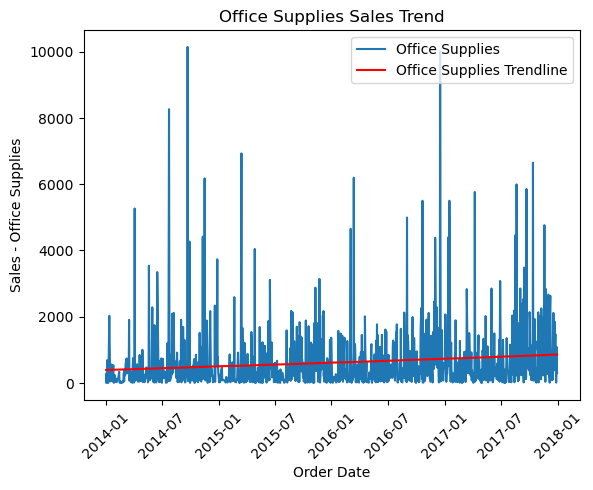

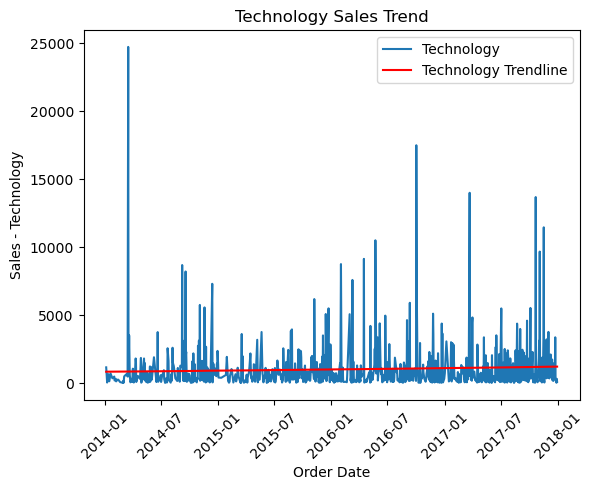

In [8]:
# Plot order date along with sales and trendline of the different category of the products.
for category, data in order_date_df.groupby('Category'):
  x = date_to_numeric(data['Order Date'])
  y = data['Sales']
  plt.plot(data['Order Date'], y, label=category)
  z = np.polyfit(range(0,len(x)), y, 1)
  p = np.poly1d(z)
  plt.plot(data['Order Date'], p(range(0,len(x))),'red',label=f"{category} Trendline")
  plt.xlabel('Order Date')
  plt.ylabel(f'Sales - {category}')
  plt.title(f'{category} Sales Trend')
  plt.xticks(rotation=45)
  plt.legend(loc='best')
  plt.show()

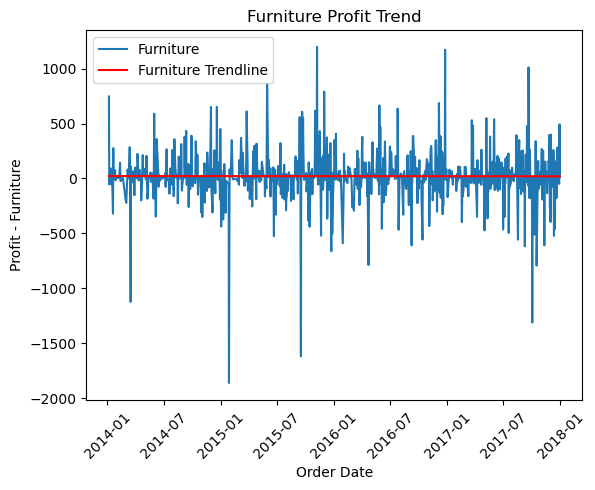

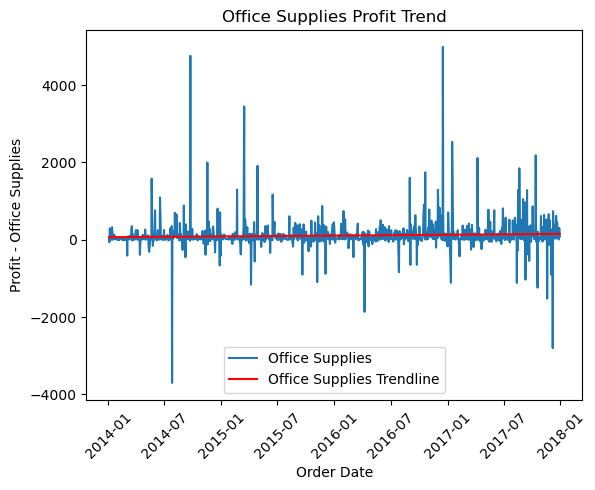

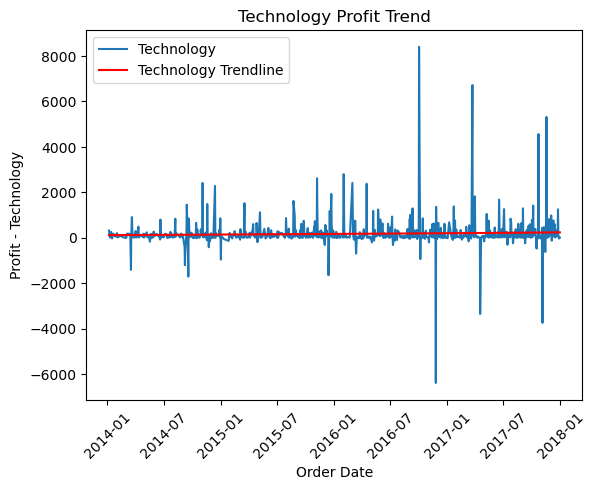

In [9]:
# Plot order date along with profit and trendline of the different category of the products.
for category, data in order_date_df.groupby('Category'):
  x = date_to_numeric(data['Order Date'])
  y = data['Profit']
  plt.plot(data['Order Date'], y, label=category)
  z = np.polyfit(range(0,len(x)), y, 1)
  p = np.poly1d(z)
  plt.plot(data['Order Date'], p(range(0,len(x))),'red',label=f"{category} Trendline")
  plt.xlabel('Order Date')
  plt.ylabel(f'Profit - {category}')
  plt.title(f'{category} Profit Trend')
  plt.xticks(rotation=45)
  plt.legend(loc='best')
  plt.show()

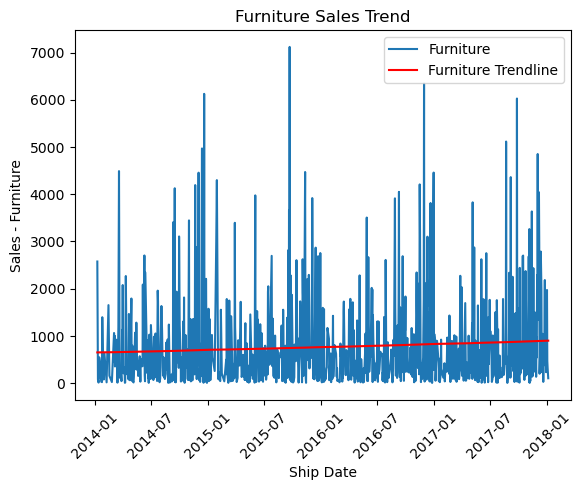

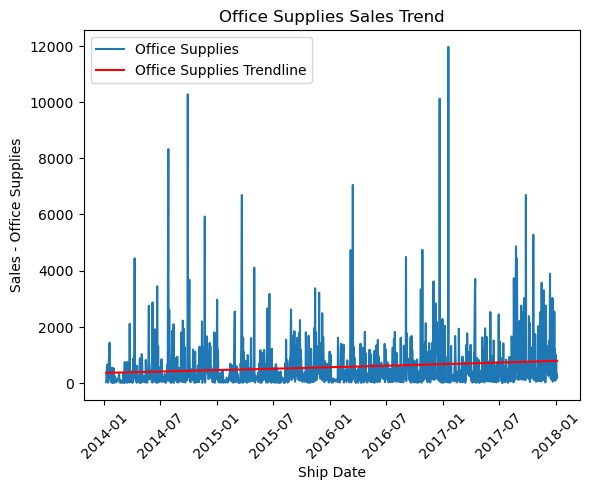

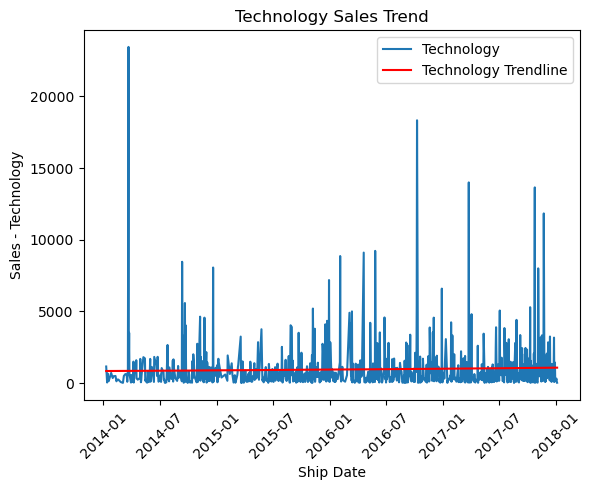

In [10]:
# Plot ship date along with sales and trendline of the different category of the products.
for category, data in ship_date_df.groupby('Category'):
  x = date_to_numeric(data['Ship Date'])
  y = data['Sales']
  plt.plot(data['Ship Date'], y, label=category)
  z = np.polyfit(range(0,len(x)), y, 1)
  p = np.poly1d(z)
  plt.plot(data['Ship Date'], p(range(0,len(x))),'red',label=f"{category} Trendline")
  plt.xlabel('Ship Date')
  plt.ylabel(f'Sales - {category}')
  plt.title(f'{category} Sales Trend')
  plt.xticks(rotation=45)
  plt.legend(loc='best')
  plt.show()

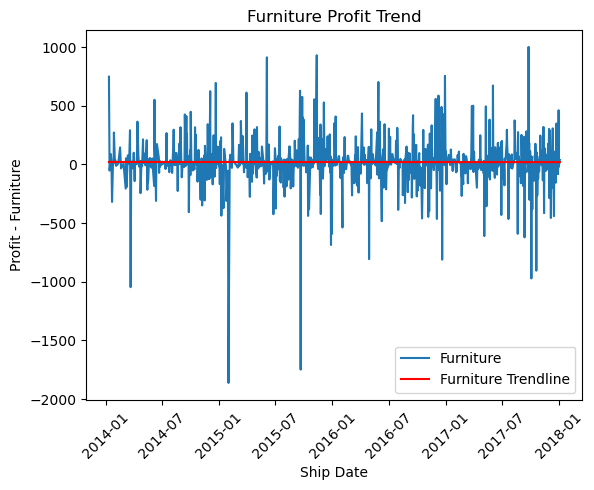

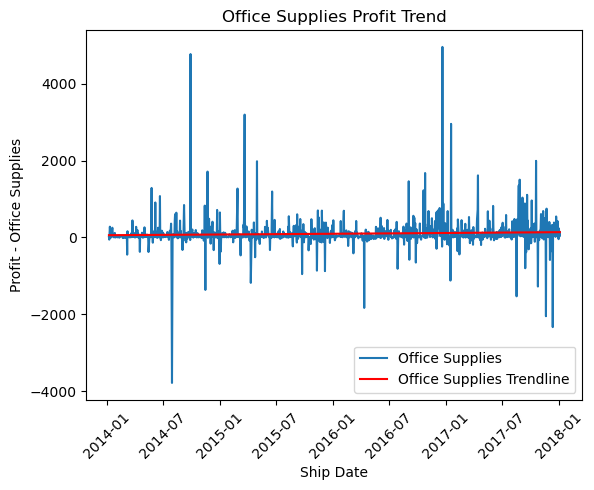

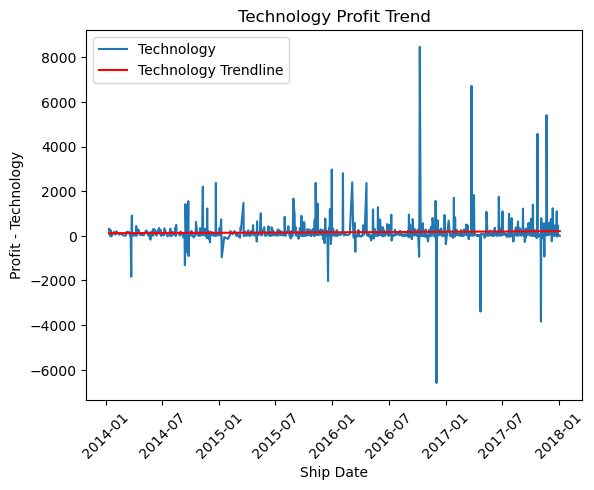

In [11]:
# Plot ship date along with profit and trendline of the different category of the products.
for category, data in ship_date_df.groupby('Category'):
  x = date_to_numeric(data['Ship Date'])
  y = data['Profit']
  plt.plot(data['Ship Date'], y, label=category)
  z = np.polyfit(range(0,len(x)), y, 1)
  p = np.poly1d(z)
  plt.plot(data['Ship Date'], p(range(0,len(x))),'red',label=f"{category} Trendline")
  plt.xlabel('Ship Date')
  plt.ylabel(f'Profit - {category}')
  plt.title(f'{category} Profit Trend')
  plt.xticks(rotation=45)
  plt.legend(loc='best')
  plt.show()